# Trading Signal Features

---

### Import Libraries and Dependencies

In [1]:
# Import libraries and dependencies
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Read in CSV as Pandas DataFrame

In [2]:
# Set path to CSV and read in CSV
csv_path = Path('BTC_USD.csv')
btc_df=pd.read_csv(csv_path)
btc_df

,Date,Close,Open,High,Low,Volumen,Change %
0,18-Jan-18,11045.0,11101.0,11881.0,10515.0,85240,-0.33%
1,19-Jan-18,11476.0,11036.0,11879.0,10649.0,48550,3.90%
2,20-Jan-18,12728.0,11462.0,13002.0,11425.0,46300,10.91%
3,21-Jan-18,11514.0,12732.0,12732.0,11020.0,53620,-9.54%
4,22-Jan-18,10771.0,11519.0,11886.0,10009.0,66350,-6.45%
...,...,...,...,...,...,...,...
1089,11-Jan-21,35476.0,38226.0,38226.0,31842.0,48040,-7.19%
1090,12-Jan-21,34103.0,35448.0,35838.6,33616.0,22180,-3.87%
1091,13-Jan-21,37375.0,34106.0,37418.0,33160.0,14890,9.59%
1092,14-Jan-21,39170.0,37374.0,39750.0,37193.0,12970,4.80%


### Set Index, Infer DateTimeFormat, and Drop Extraneous Columns

In [3]:
# Set index as datetime object and drop extraneous columns
btc_df.set_index(pd.to_datetime(btc_df['Date'], infer_datetime_format=True), inplace=True)

### Drop NAs and Calculate Daily Returns 

In [4]:
# Drop NAs and calculate daily percent return
btc_df['daily_return'] = btc_df['Close'].dropna().pct_change()
btc_df.head()

,Date,Close,Open,High,Low,Volumen,Change %,daily_return
Date,,,,,,,,
2018-01-18,18-Jan-18,11045.0,11101.0,11881.0,10515.0,85240,-0.33%,NaN
2018-01-19,19-Jan-18,11476.0,11036.0,11879.0,10649.0,48550,3.90%,0.039022
2018-01-20,20-Jan-18,12728.0,11462.0,13002.0,11425.0,46300,10.91%,0.109097
2018-01-21,21-Jan-18,11514.0,12732.0,12732.0,11020.0,53620,-9.54%,-0.095380
2018-01-22,22-Jan-18,10771.0,11519.0,11886.0,10009.0,66350,-6.45%,-0.064530


### Construct Exponential Moving Average of Closing Prices (Trading Signal, Feature One)

In [5]:
# Set short and long windows
short_window = 1
long_window = 10

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
btc_df['fast_close'] = btc_df['Close'].ewm(halflife=short_window).mean()
btc_df['slow_close'] = btc_df['Close'].ewm(halflife=long_window).mean()

# Construct a crossover trading signal
btc_df['crossover_long'] = np.where(btc_df['fast_close'] > btc_df['slow_close'], 1.0, 0.0)
btc_df['crossover_short'] = np.where(btc_df['fast_close'] < btc_df['slow_close'], -1.0, 0.0)
btc_df['crossover_signal'] = btc_df['crossover_long'] + btc_df['crossover_short']

btc_df.head()

,Date,Close,Open,High,Low,Volumen,Change %,daily_return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal
Date,,,,,,,,,,,,,
2018-01-18,18-Jan-18,11045.0,11101.0,11881.0,10515.0,85240,-0.33%,NaN,11045.000000,11045.000000,0.0,0.0,0.0
2018-01-19,19-Jan-18,11476.0,11036.0,11879.0,10649.0,48550,3.90%,0.039022,11332.333333,11267.965672,1.0,0.0,1.0
2018-01-20,20-Jan-18,12728.0,11462.0,13002.0,11425.0,46300,10.91%,0.109097,12129.857143,11788.739995,1.0,0.0,1.0
2018-01-21,21-Jan-18,11514.0,12732.0,12732.0,11020.0,53620,-9.54%,-0.095380,11801.400000,11712.757567,1.0,0.0,1.0
2018-01-22,22-Jan-18,10771.0,11519.0,11886.0,10009.0,66350,-6.45%,-0.064530,11269.580645,11497.434429,0.0,-1.0,-1.0


### Plot Exponential Moving Average of Closing Prices

<AxesSubplot:xlabel='Date'>

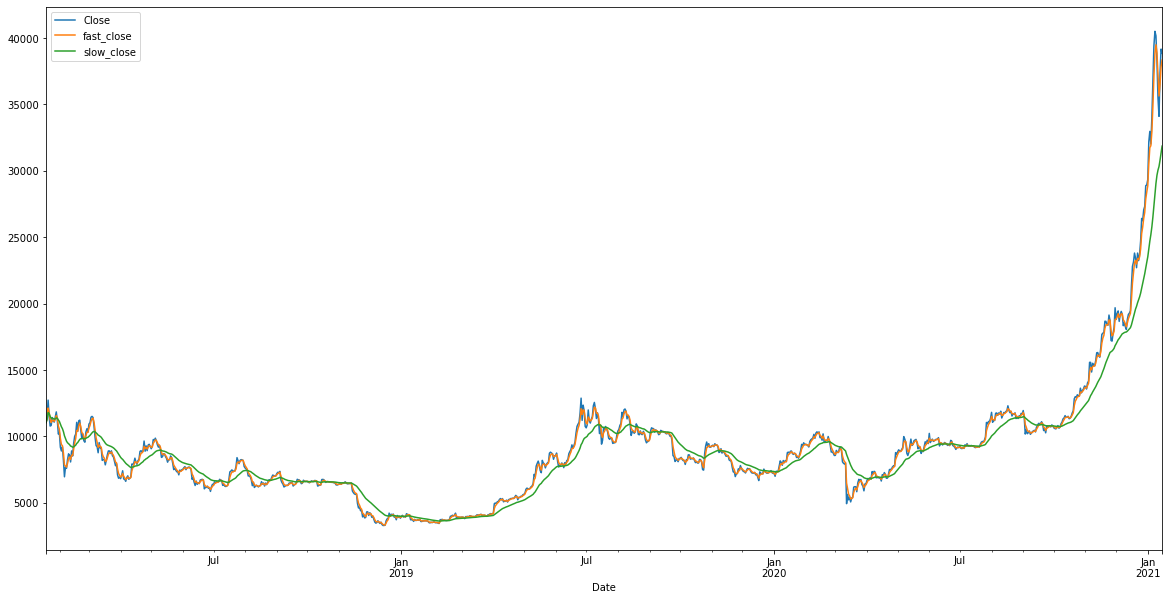

In [6]:
# Plot the EMA of BTC/USD closing prices
btc_df[['Close', 'fast_close', 'slow_close']].plot(figsize=(20,10))

### Construct Exponential Moving Average of Daily Return Volatility (Trading Signal, Feature Two)

In [7]:
# Set short and long volatility windows
short_vol_window = 1
long_vol_window = 10

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
btc_df['fast_vol'] = btc_df['daily_return'].ewm(halflife=short_vol_window).std()
btc_df['slow_vol'] = btc_df['daily_return'].ewm(halflife=long_vol_window).std()

# Construct a crossover trading signal
btc_df['vol_trend_long'] = np.where(btc_df['fast_vol'] < btc_df['slow_vol'], 1.0, 0.0)
btc_df['vol_trend_short'] = np.where(btc_df['fast_vol'] > btc_df['slow_vol'], -1.0, 0.0) 
btc_df['vol_trend_signal'] = btc_df['vol_trend_long'] + btc_df['vol_trend_short']

btc_df

,Date,Close,Open,High,Low,Volumen,Change %,daily_return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal,fast_vol,slow_vol,vol_trend_long,vol_trend_short,vol_trend_signal
Date,,,,,,,,,,,,,,,,,,
2018-01-18,18-Jan-18,11045.0,11101.0,11881.0,10515.0,85240,-0.33%,NaN,11045.000000,11045.000000,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
2018-01-19,19-Jan-18,11476.0,11036.0,11879.0,10649.0,48550,3.90%,0.039022,11332.333333,11267.965672,1.0,0.0,1.0,NaN,NaN,0.0,0.0,0.0
2018-01-20,20-Jan-18,12728.0,11462.0,13002.0,11425.0,46300,10.91%,0.109097,12129.857143,11788.739995,1.0,0.0,1.0,0.049551,0.049551,0.0,0.0,0.0
2018-01-21,21-Jan-18,11514.0,12732.0,12732.0,11020.0,53620,-9.54%,-0.095380,11801.400000,11712.757567,1.0,0.0,1.0,0.121973,0.105948,0.0,-1.0,-1.0
2018-01-22,22-Jan-18,10771.0,11519.0,11886.0,10009.0,66350,-6.45%,-0.064530,11269.580645,11497.434429,0.0,-1.0,-1.0,0.085153,0.094269,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-11,11-Jan-21,35476.0,38226.0,38226.0,31842.0,48040,-7.19%,-0.071941,37168.149218,30055.984262,1.0,0.0,1.0,0.049965,0.046624,0.0,-1.0,-1.0
2021-01-12,12-Jan-21,34103.0,35448.0,35838.6,33616.0,22180,-3.87%,-0.038702,35635.574609,30327.000799,1.0,0.0,1.0,0.035444,0.047102,1.0,0.0,1.0
2021-01-13,13-Jan-21,37375.0,34106.0,37418.0,33160.0,14890,9.59%,0.095945,36505.287304,30798.984221,1.0,0.0,1.0,0.087532,0.050272,0.0,-1.0,-1.0


### Plot Exponential Moving Average of Daily Return Volatility

<AxesSubplot:xlabel='Date'>

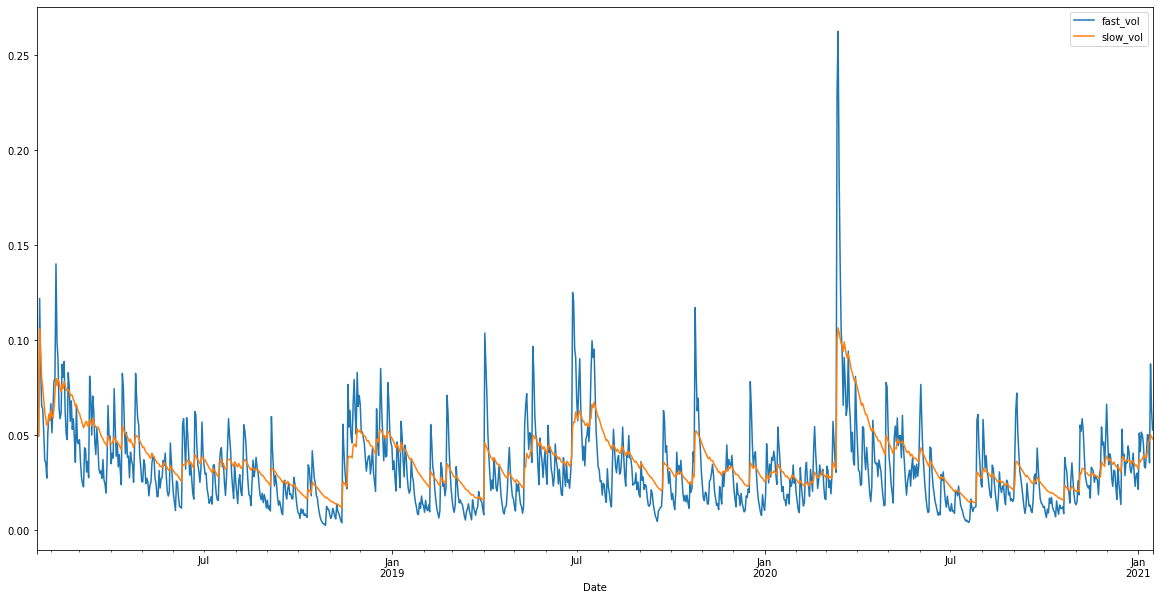

In [8]:
# Plot the EMA of BTC/USD daily return volatility
btc_df[['fast_vol', 'slow_vol']].plot(figsize=(20,10))

### Construct Bollinger Band (Trading Signal, Feature Three)

In [9]:
# Set bollinger band window
bollinger_window = 20

# Calculate rolling mean and standard deviation
btc_df['bollinger_mid_band'] = btc_df['Close'].rolling(window=bollinger_window).mean()
btc_df['bollinger_std'] = btc_df['Close'].rolling(window=20).std()

# Calculate upper and lowers bands of bollinger band
btc_df['bollinger_upper_band']  = btc_df['bollinger_mid_band'] + (btc_df['bollinger_std'] * 1)
btc_df['bollinger_lower_band']  = btc_df['bollinger_mid_band'] - (btc_df['bollinger_std'] * 1)

# Calculate bollinger band trading signal
btc_df['bollinger_long'] = np.where(btc_df['Close'] < btc_df['bollinger_lower_band'], 1.0, 0.0)
btc_df['bollinger_short'] = np.where(btc_df['Close'] > btc_df['bollinger_upper_band'], -1.0, 0.0)
btc_df['bollinger_signal'] = btc_df['bollinger_long'] + btc_df['bollinger_short']

btc_df

,Date,Close,Open,High,Low,Volumen,Change %,daily_return,fast_close,slow_close,...,vol_trend_long,vol_trend_short,vol_trend_signal,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-18,18-Jan-18,11045.0,11101.0,11881.0,10515.0,85240,-0.33%,NaN,11045.000000,11045.000000,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2018-01-19,19-Jan-18,11476.0,11036.0,11879.0,10649.0,48550,3.90%,0.039022,11332.333333,11267.965672,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2018-01-20,20-Jan-18,12728.0,11462.0,13002.0,11425.0,46300,10.91%,0.109097,12129.857143,11788.739995,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2018-01-21,21-Jan-18,11514.0,12732.0,12732.0,11020.0,53620,-9.54%,-0.095380,11801.400000,11712.757567,...,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2018-01-22,22-Jan-18,10771.0,11519.0,11886.0,10009.0,66350,-6.45%,-0.064530,11269.580645,11497.434429,...,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-11,11-Jan-21,35476.0,38226.0,38226.0,31842.0,48040,-7.19%,-0.071941,37168.149218,30055.984262,...,0.0,-1.0,-1.0,31379.35,5618.995464,36998.345464,25760.354536,0.0,0.0,0.0
2021-01-12,12-Jan-21,34103.0,35448.0,35838.6,33616.0,22180,-3.87%,-0.038702,35635.574609,30327.000799,...,1.0,0.0,1.0,31922.80,5306.668472,37229.468472,26616.131528,0.0,0.0,0.0
2021-01-13,13-Jan-21,37375.0,34106.0,37418.0,33160.0,14890,9.59%,0.095945,36505.287304,30798.984221,...,0.0,-1.0,-1.0,32604.80,5070.232068,37675.032068,27534.567932,0.0,0.0,0.0


### Plot Bollinger Bands

<AxesSubplot:xlabel='Date'>

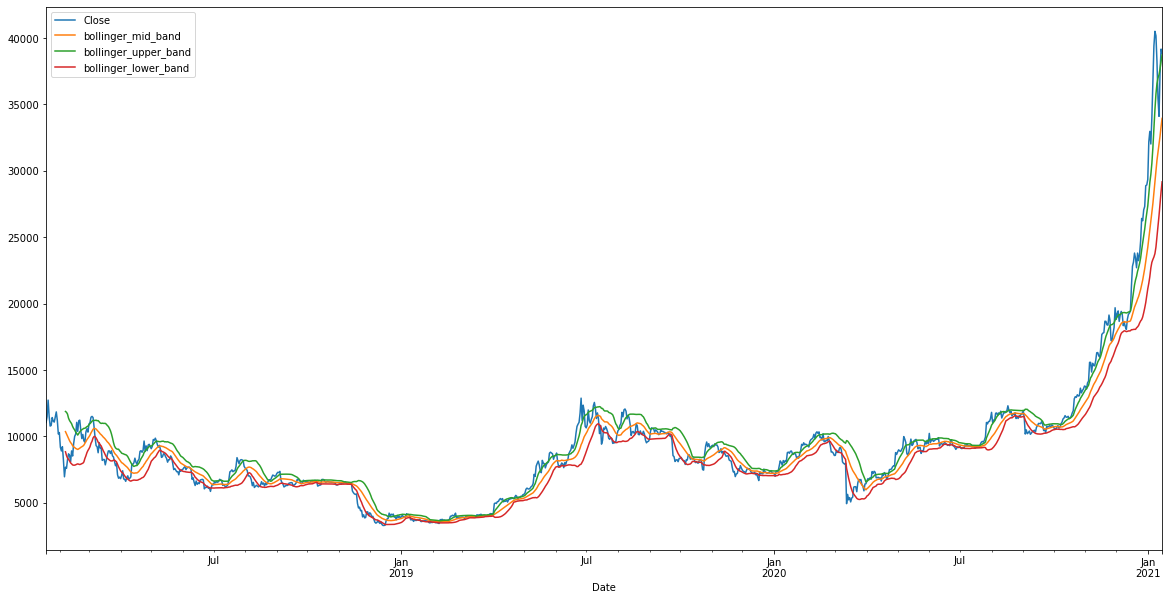

In [10]:
# Plot the Bollinger Bands for BTC/USD closing prices
btc_df[['Close','bollinger_mid_band','bollinger_upper_band','bollinger_lower_band']].plot(figsize=(20,10))

Construct True Strength Index (Trading Signal, Feature Four)


In [11]:
#set window fast and slow 
#set close
#set fillna
#

Construct Moving Average Convergence Divergence (MACD) Signal Feature four 

In [27]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [28]:
#Calculate the MACD and Signal Line indicators
#Calculate the Short Term Exponential Moving Average
ShortEMA = btc_df.Close.ewm(span=12, adjust=False).mean() #AKA Fast moving average
#Calculate the Long Term Exponential Moving Average
LongEMA = btc_df.Close.ewm(span=26, adjust=False).mean() #AKA Slow moving average
#Calculate the Moving Average Convergence/Divergence (MACD)
MACD = ShortEMA - LongEMA
#Calcualte the signal line
signal = MACD.ewm(span=9, adjust=False).mean()


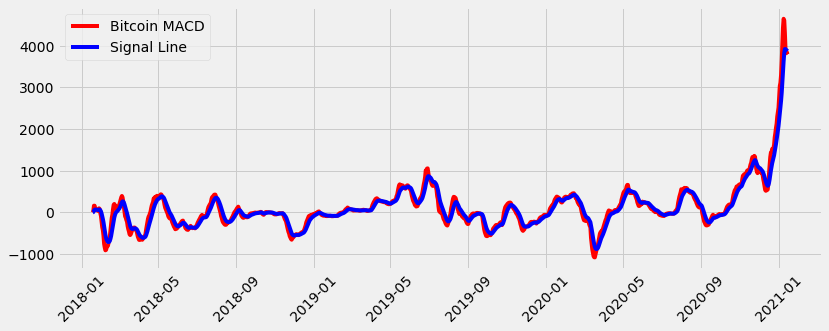

In [29]:
#Plot the chart
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot(btc_df.index, MACD, label='Bitcoin MACD', color = 'red')
plt.plot(btc_df.index, signal, label='Signal Line', color='blue')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

In [52]:
#Create new columns for the data frame 
btc_df['MACD'] = MACD
btc_df['macd_line'] = signal
#Show the new data frame
btc_df

,Date,Close,Open,High,Low,Volumen,Change %,daily_return,fast_close,slow_close,...,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal,MACD,macd_line,macd_long,macd_short,macd_signal
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-18,18-Jan-18,11045.0,11101.0,11881.0,10515.0,85240,-0.33%,NaN,11045.000000,11045.000000,...,NaN,NaN,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
2018-01-19,19-Jan-18,11476.0,11036.0,11879.0,10649.0,48550,3.90%,0.039022,11332.333333,11267.965672,...,NaN,NaN,0.0,0.0,0.0,34.381766,6.876353,1.0,-1.0,0.0
2018-01-20,20-Jan-18,12728.0,11462.0,13002.0,11425.0,46300,10.91%,0.109097,12129.857143,11788.739995,...,NaN,NaN,0.0,0.0,0.0,160.801877,37.661458,1.0,-1.0,0.0
2018-01-21,21-Jan-18,11514.0,12732.0,12732.0,11020.0,53620,-9.54%,-0.095380,11801.400000,11712.757567,...,NaN,NaN,0.0,0.0,0.0,161.173167,62.363800,1.0,-1.0,0.0
2018-01-22,22-Jan-18,10771.0,11519.0,11886.0,10009.0,66350,-6.45%,-0.064530,11269.580645,11497.434429,...,NaN,NaN,0.0,0.0,0.0,100.356677,69.962375,1.0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-11,11-Jan-21,35476.0,38226.0,38226.0,31842.0,48040,-7.19%,-0.071941,37168.149218,30055.984262,...,36998.345464,25760.354536,0.0,0.0,0.0,4310.035826,3921.756293,1.0,-1.0,0.0
2021-01-12,12-Jan-21,34103.0,35448.0,35838.6,33616.0,22180,-3.87%,-0.038702,35635.574609,30327.000799,...,37229.468472,26616.131528,0.0,0.0,0.0,3915.185170,3920.442069,0.0,0.0,0.0
2021-01-13,13-Jan-21,37375.0,34106.0,37418.0,33160.0,14890,9.59%,0.095945,36505.287304,30798.984221,...,37675.032068,27534.567932,0.0,0.0,0.0,3822.225993,3900.798853,0.0,0.0,0.0


In [44]:
btc_df['macd_long'] = np.where(btc_df['MACD'] > btc_df['macd_line'], 1.0, 0.0)
btc_df['macd_short'] = np.where(btc_df['macd_line'] < btc_df['MACD'], -1.0, 0.0)
btc_df['macd_signal'] = btc_df['macd_long'] + btc_df['macd_short']

<AxesSubplot:xlabel='Date'>

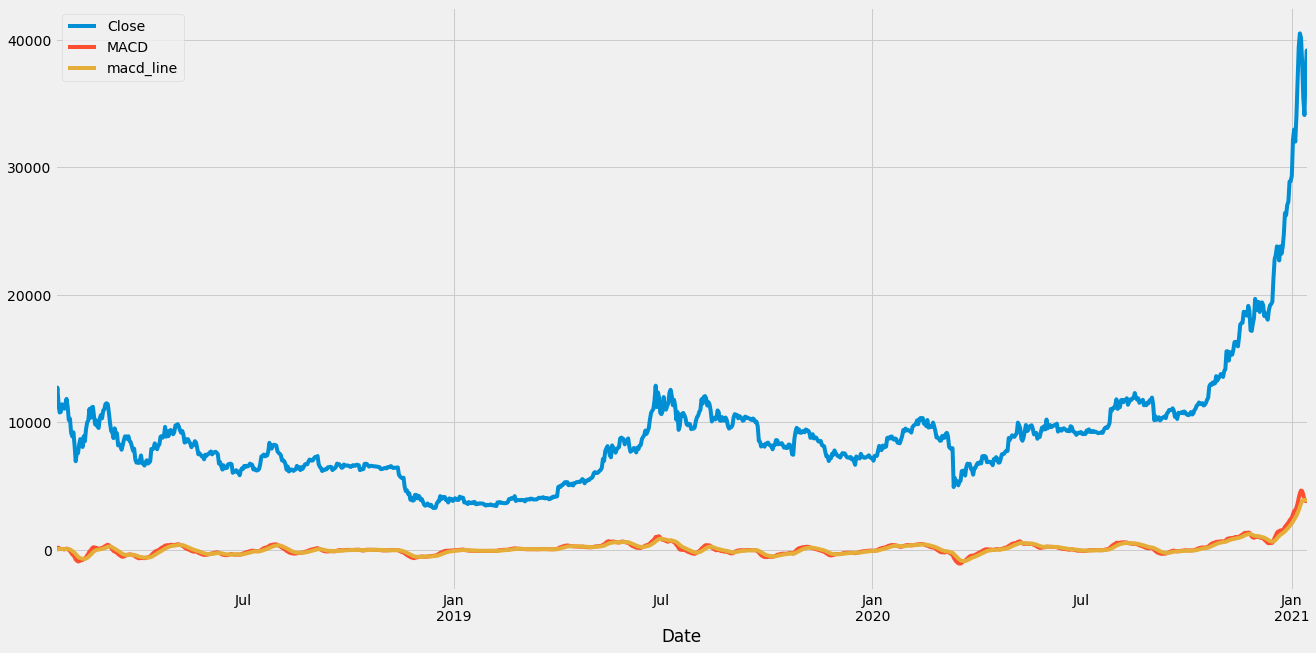

In [45]:
btc_df[['Close', 'MACD', 'macd_line']].plot(figsize=(20,10))

In [53]:
#Create a function to signal when to buy and sell an asset
def buy_sell(signal):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(0,len(signal)):
    #if MACD > signal line  then buy else sell
      if signal['MACD'][i] > signal['Signal Line'][i]:
        if flag != 1:
          sigPriceBuy.append(signal['Close'][i])
          sigPriceSell.append(np.nan)
          flag = 1
        else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
      elif signal['MACD'][i] < signal['Signal Line'][i]: 
        if flag != 0:
          sigPriceSell.append(signal['Close'][i])
          sigPriceBuy.append(np.nan)
          flag = 0
        else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
      else: #Handling nan values
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
  
  return (sigPriceBuy, sigPriceSell)

In [47]:
#Create buy and sell columns
x = buy_sell(btc_df)
btc_df['MACD_Buy_Signal_Price'] = x[0]
btc_df['MACD_Sell_Signal_Price'] = x[1]
#Show the data frame
btc_df

KeyError: 'Signal Line'

In [49]:
# Visually Show The Stock buy and sell signals
# Create the title 
title = 'Close Price History Buy / Sell Signals   '
#Get the stocks
my_crypto = btc_df
  
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.scatter(my_crypto.index, my_crypto['MACD_Buy_Signal_Price'], color = 'green', label='Buy Signal', marker = '^', alpha = 1)
plt.scatter(my_crypto.index, my_crypto['MACD_Sell_Signal_Price'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1)
plt.plot( my_crypto['Close'],  label='Close Price', alpha = 0.35)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.xticks(rotation=45)
plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.legend( loc='upper left')
plt.show()

KeyError: 'MACD_Buy_Signal_Price'

<Figure size 878.4x324 with 0 Axes>

In [50]:
delta = btc_df['Close'].diff(1) #Use diff() function to find the discrete difference over the column axis with period value equal to 1
delta = delta.dropna() # or delta[1:]
up =  delta.copy() #Make a copy of this object's indices and data
down = delta.copy() #Make a copy of this object's indices and data
up[up < 0] = 0 
down[down > 0] = 0 
time_period = 14
AVG_Gain = up.rolling(window=time_period).mean()
AVG_Loss = abs(down.rolling(window=time_period).mean())
RS = AVG_Gain / AVG_Loss
RSI = 100.0 - (100.0/ (1.0 + RS))


Construct Relative Strength Index RSI(Trading Signal, Feature Five)

plt.figure(figsize=(12.2,4.5))
RSI.plot()
plt.show()

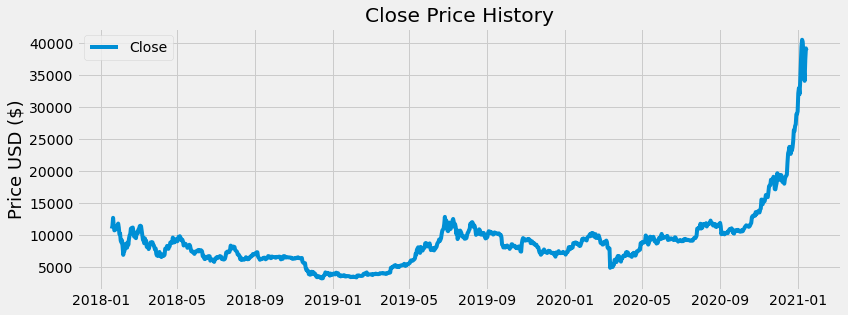

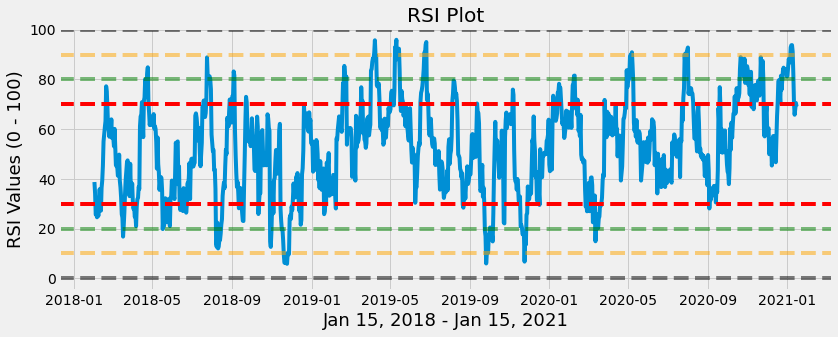

In [19]:
new_df = pd.DataFrame()
new_df['Close'] = btc_df['Close']
new_df['RSI'] = RSI
plt.figure(figsize=(12.2,4.5))
plt.plot(new_df.index, new_df['Close'])
plt.title('Close Price History')
plt.ylabel('Price USD ($)',fontsize=18)
plt.legend(new_df.columns.values, loc='upper left')
plt.show()
plt.figure(figsize=(12.33,4.5))
plt.title('RSI Plot')
plt.plot(new_df.index, new_df['RSI'])
plt.axhline(0, linestyle='--', alpha=0.5, color = 'black')
plt.axhline(10, linestyle='--', alpha=0.5, color = 'orange')
plt.axhline(20, linestyle='--', alpha=0.5, color = 'green')
plt.axhline(30, linestyle='--',color = 'red')
plt.axhline(70, linestyle='--', color = 'red')
plt.axhline(80, linestyle='--', alpha=0.5, color = 'green')
plt.axhline(90, linestyle='--', alpha=0.5, color = 'orange')
plt.axhline(100, linestyle='--', alpha=0.5, color = 'black')
plt.xlabel('Jan 15, 2018 - Jan 15, 2021',fontsize=18)
plt.ylabel('RSI Values (0 - 100)',fontsize=18)
plt.show()

In [26]:
new_df

,Close,RSI
Date,,
2018-01-18,11045.0,NaN
2018-01-19,11476.0,NaN
2018-01-20,12728.0,NaN
2018-01-21,11514.0,NaN
2018-01-22,10771.0,NaN
...,...,...
2021-01-11,35476.0,70.646522
2021-01-12,34103.0,65.784578
2021-01-13,37375.0,68.301090


In [22]:
from ta.volatility import (
    AverageTrueRange,
    BollingerBands,
    DonchianChannel,
    KeltnerChannel,
    UlcerIndex,
)

In [23]:
from ta.momentum import (
    AwesomeOscillatorIndicator,
    KAMAIndicator,
    PercentagePriceOscillator,
    PercentageVolumeOscillator,
    ROCIndicator,
    RSIIndicator,
    StochasticOscillator,
    StochRSIIndicator,
    TSIIndicator,
    UltimateOscillator,
    WilliamsRIndicator,
)

In [24]:
  # Vortex Indicator
indicator_vortex = VortexIndicator(
    high=btc_df['High'], low=btc_df['Low'], close=btc_df['Close'], window=14
    )
btc_df[f"{colprefix}trend_vortex_ind_pos"] = indicator_vortex.vortex_indicator_pos()
btc_df[f"{colprefix}trend_vortex_ind_neg"] = indicator_vortex.vortex_indicator_neg()
btc_df[f"{colprefix}trend_vortex_ind_diff"] = indicator_vortex.vortex_indicator_diff()

NameError: name 'colprefix' is not defined

In [25]:
  # Ichimoku Indicator
    indicator_ichi = IchimokuIndicator(
        high=df[high],
        low=df[low],
        window1=9,
        window2=26,
        window3=52,
        visual=False,
        fillna=fillna,
    )
    df[f"{colprefix}trend_ichimoku_conv"] = indicator_ichi.ichimoku_conversion_line()
    df[f"{colprefix}trend_ichimoku_base"] = indicator_ichi.ichimoku_base_line()
    df[f"{colprefix}trend_ichimoku_a"] = indicator_ichi.ichimoku_a()
    df[f"{colprefix}trend_ichimoku_b"] = indicator_ichi.ichimoku_b()
    indicator_ichi_visual = IchimokuIndicator(
        high=df[high],
        low=df[low],
        window1=9,
        window2=26,
        window3=52,
        visual=True,
        fillna=fillna,
    )
    df[f"{colprefix}trend_visual_ichimoku_a"] = indicator_ichi_visual.ichimoku_a()
    df[f"{colprefix}trend_visual_ichimoku_b"] = indicator_ichi_visual.ichimoku_b()


IndentationError: unexpected indent (<ipython-input-25-4657e1d0cf9b>, line 2)

In [ ]:
  # Percentage Price Oscillator
    indicator_ppo = PercentagePriceOscillator(
        close=df[close], window_slow=26, window_fast=12, window_sign=9, fillna=fillna
    )
    df[f"{colprefix}momentum_ppo"] = indicator_ppo.ppo()
    df[f"{colprefix}momentum_ppo_signal"] = indicator_ppo.ppo_signal()
    df[f"{colprefix}momentum_ppo_hist"] = indicator_ppo.ppo_hist()